In [1]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from keras.utils.np_utils import to_categorical

In [3]:
#import Dataset
df = pd.read_csv("C:/Users/Dell/Downloads/letters.csv")
df

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [4]:
print(df.columns)

Index(['label', 'pixel43', 'pixel44', 'pixel92', 'pixel124', 'pixel125',
       'pixel126', 'pixel127', 'pixel128', 'pixel129', 'pixel130', 'pixel131',
       'pixel132', 'pixel133', 'pixel134', 'pixel135', 'pixel136', 'pixel137',
       'pixel138', 'pixel146', 'pixel147', 'pixel148', 'pixel149', 'pixel150',
       'pixel151', 'pixel152', 'pixel153', 'pixel154', 'pixel155', 'pixel156',
       'pixel157', 'pixel158', 'pixel159', 'pixel160', 'pixel327', 'pixel328',
       'pixel329', 'pixel351', 'pixel410', 'pixel411', 'pixel412', 'pixel413',
       'pixel414', 'pixel415', 'pixel416', 'pixel417'],
      dtype='object')


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [6]:
df.isnull ()
df.isnull().sum()

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [19]:
df.describe()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,29.000000,21.000000,0.000000,...,10.000000,247.000000,250.000000,191.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [10]:
!pip install keras

In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split


X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the KNN models with different values of K
k_values = [3, 7]  # Example values, you can adjust as per your needs

for k in k_values:
    # Create the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("K Value:", k)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    
    print("----------")

K Value: 3
Accuracy: 0.6303571428571428
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       853
           1       0.74      0.95      0.83       934
           2       0.58      0.65      0.61       851
           3       0.52      0.54      0.53       847
           4       0.55      0.55      0.55       810
           5       0.58      0.54      0.56       728
           6       0.86      0.88      0.87       806
           7       0.49      0.48      0.48       871
           8       0.65      0.47      0.54       848
           9       0.46      0.34      0.39       852

    accuracy                           0.63      8400
   macro avg       0.62      0.63      0.62      8400
weighted avg       0.62      0.63      0.62      8400

----------
K Value: 7
Accuracy: 0.6577380952380952
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       853
           1       0.76      0.95      0.

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# Split the data into features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the Random Forest model with different numbers of trees
num_trees = [100, 200]  # Example values, you can adjust as per your needs

for n in num_trees:
    # Create the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Number of Trees:", n)
    print("Accuracy:", accuracy)
    print("----------")

Number of Trees: 100
Accuracy: 0.6914285714285714
----------
Number of Trees: 200
Accuracy: 0.6965476190476191
----------


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report

X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build the neural network model with two different activation functions
mlp_relu = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp_tanh = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=1000)

# Train the models
mlp_relu.fit(X_train, y_train)
mlp_tanh.fit(X_train, y_train)

# Make predictions
predictions_relu = mlp_relu.predict(X_test)
predictions_tanh = mlp_tanh.predict(X_test)

# Evaluate the models
accuracy_relu = accuracy_score(y_test, predictions_relu)
accuracy_tanh = accuracy_score(y_test, predictions_tanh)
classification_report_relu = classification_report(y_test, predictions_relu)
classification_report_tanh = classification_report(y_test, predictions_tanh)



print("Accuracy with ReLU activation:", accuracy_relu)
print("Accuracy with Tanh activation:", accuracy_tanh)
print("Classification Report with ReLU activation:")
print(classification_report_relu)

print("Classification Report with Tanh activation:")
print(classification_report_tanh)

Accuracy with ReLU activation: 0.6892857142857143
Accuracy with Tanh activation: 0.6827380952380953
Classification Report with ReLU activation:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       848
           1       0.85      0.95      0.90       975
           2       0.68      0.67      0.67       843
           3       0.61      0.63      0.62       830
           4       0.75      0.56      0.64       776
           5       0.68      0.61      0.64       795
           6       0.91      0.87      0.89       836
           7       0.47      0.71      0.57       839
           8       0.62      0.54      0.58       806
           9       0.51      0.42      0.46       852

    accuracy                           0.69      8400
   macro avg       0.69      0.68      0.68      8400
weighted avg       0.70      0.69      0.69      8400

Classification Report with Tanh activation:
              precision    recall  f1-score   support

In [15]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Benchmark metric function
def benchmark_metric(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

# K-Nearest Neighbors
k_values = [3, 7]

for k in k_values:
    # Create the KNN model and train it
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Make predictions and calculate benchmark metric
    y_pred = knn_model.predict(X_test)
    benchmark_score = benchmark_metric(y_test, y_pred)
    
    print("KNN - K Value:", k)
    print("Benchmark Metric:", benchmark_score)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("----------")

# Random Forest
num_trees = [100, 200]

for n in num_trees:
    # Create the Random Forest model and train it
    rf_model = RandomForestClassifier(n_estimators=n)
    rf_model.fit(X_train, y_train)
    
    # Make predictions and calculate benchmark metric
    y_pred = rf_model.predict(X_test)
    benchmark_score = benchmark_metric(y_test, y_pred)
    
    print("Random Forest - Number of Trees:", n)
    print("Benchmark Metric:", benchmark_score)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("----------")

# Multi-Layer Perceptron
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

mlp_relu = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp_tanh = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=1000)

mlp_relu.fit(X_train_normalized, y_train)
mlp_tanh.fit(X_train_normalized, y_train)

predictions_relu = mlp_relu.predict(X_test_normalized)
predictions_tanh = mlp_tanh.predict(X_test_normalized)

accuracy_relu = accuracy_score(y_test, predictions_relu)
accuracy_tanh = accuracy_score(y_test, predictions_tanh)

print("MLP - Activation: ReLU")
print("Benchmark Metric:", benchmark_metric(y_test, predictions_relu))
print("Accuracy:", accuracy_relu)
print(classification_report(y_test, predictions_relu))
print("----------")

print("MLP - Activation: Tanh")
print("Benchmark Metric:", benchmark_metric(y_test, predictions_tanh))
print("Accuracy:", accuracy_tanh)
print(classification_report(y_test, predictions_tanh))
print("----------")

KNN - K Value: 3
Benchmark Metric: 0.6245799471895512
Accuracy: 0.6342857142857142
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       828
           1       0.74      0.94      0.83       905
           2       0.57      0.63      0.60       803
           3       0.50      0.58      0.54       826
           4       0.58      0.58      0.58       858
           5       0.65      0.54      0.59       793
           6       0.86      0.86      0.86       864
           7       0.47      0.48      0.48       831
           8       0.63      0.47      0.54       835
           9       0.47      0.35      0.41       857

    accuracy                           0.63      8400
   macro avg       0.63      0.63      0.62      8400
weighted avg       0.63      0.63      0.63      8400

----------
KNN - K Value: 7
Benchmark Metric: 0.6492122419368648
Accuracy: 0.6561904761904762
              precision    recall  f1-score   support

         

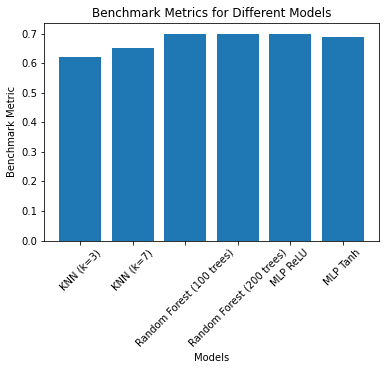

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Benchmark metric function
def benchmark_metric(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

# Initialize lists to store benchmark scores
knn_scores = []
rf_scores = []
mlp_relu_scores = []
mlp_tanh_scores = []

# K-Nearest Neighbors
k_values = [3, 7]

for k in k_values:
    # Create the KNN model and train it
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Make predictions and calculate benchmark metric
    y_pred = knn_model.predict(X_test)
    benchmark_score = benchmark_metric(y_test, y_pred)
    knn_scores.append(benchmark_score)

# Random Forest
num_trees = [100, 200]

for n in num_trees:
    # Create the Random Forest model and train it
    rf_model = RandomForestClassifier(n_estimators=n)
    rf_model.fit(X_train, y_train)
    
    # Make predictions and calculate benchmark metric
    y_pred = rf_model.predict(X_test)
    benchmark_score = benchmark_metric(y_test, y_pred)
    rf_scores.append(benchmark_score)

# Multi-Layer Perceptron
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

mlp_relu = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp_tanh = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=1000)

mlp_relu.fit(X_train_normalized, y_train)
mlp_tanh.fit(X_train_normalized, y_train)

predictions_relu = mlp_relu.predict(X_test_normalized)
predictions_tanh = mlp_tanh.predict(X_test_normalized)

mlp_relu_scores.append(benchmark_metric(y_test, predictions_relu))
mlp_tanh_scores.append(benchmark_metric(y_test, predictions_tanh))

# Create a bar chart
models = ['KNN (k=3)', 'KNN (k=7)', 'Random Forest (100 trees)', 'Random Forest (200 trees)', 'MLP ReLU', 'MLP Tanh']
scores = knn_scores + rf_scores + mlp_relu_scores + mlp_tanh_scores

plt.bar(models, scores)
plt.title('Benchmark Metrics for Different Models')
plt.xlabel('Models')
plt.ylabel('Benchmark Metric')
plt.xticks(rotation=45)
plt.show()